In [12]:
#import the modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load CSV data
df = pd.read_csv("D:\\EPICS\\Rain_crop_prediction\\Crop_recommendation.csv")

In [3]:
# Encode categorical label
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [4]:
# Split data into input and output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# Define the model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Convert labels to one-hot encoding
y_one_hot = keras.utils.to_categorical(y, num_classes=len(le.classes_))

In [13]:
# Evaluate the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]
    
    # Train the model on the train set
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    score = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    scores.append(score)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {np.mean(scores)}")

14/14 [==============================] - 0s 1ms/step
Cross-validation scores: [0.9568181818181818, 0.9681818181818181, 0.9409090909090909, 0.9659090909090909, 0.9431818181818182]
Mean score: 0.9549999999999998


In [14]:
# Train the model on the full dataset
model.fit(X, y_one_hot, epochs=10, batch_size=32)

Epoch 1/10
69/69 [==============================] - 1s 1ms/step - loss: 0.0910 - accuracy: 0.9682
Epoch 2/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9705
Epoch 3/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9650
Epoch 4/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9655
Epoch 5/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9691
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9736
Epoch 7/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9645
Epoch 8/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9755
Epoch 9/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9709
Epoch 10/10
69/69 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9700


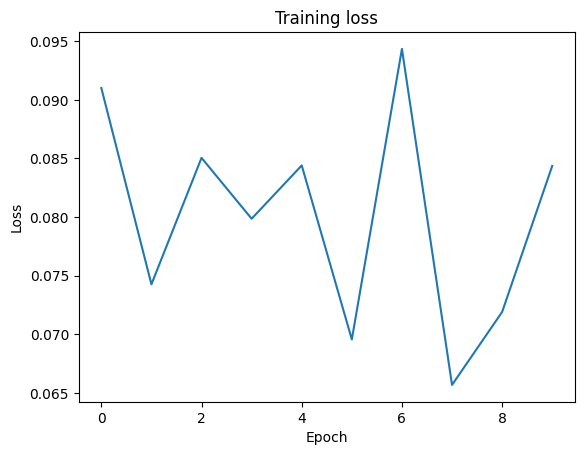

In [15]:
# Plot the training loss
plt.plot(model.history.history['loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

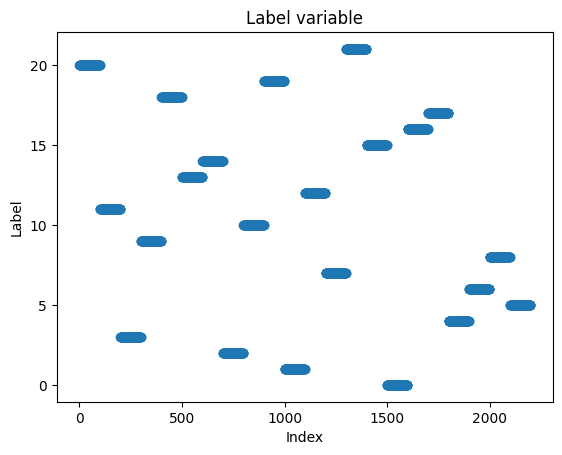

In [16]:
# Create a scatter plot for the label variable
plt.scatter(df.index, df['label'])
plt.title('Label variable')
plt.xlabel('Index')
plt.ylabel('Label')
plt.show()

In [17]:
# Predict the output
print('Enter the values of N, P, K, temperature, humidity, ph, rainfall (separated by comma):')
user_input = input().strip().split(',')
user_input = [float(i) for i in user_input]
user_input = [user_input]  # wrap in list to match shape (None, X.shape[1])
prediction = model.predict(user_input)[0]
predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
print(f"The predicted crop is: {predicted_label}")

Enter the values of N, P, K, temperature, humidity, ph, rainfall (separated by comma):


 70, 20, 40, 29, 78.9834, 5.76, 234.0123


1/1 [==============================] - 0s 80ms/step
The predicted crop is: rice
